# FCED - STATISTICS

- Vitor Pereira - up202210497

## Table of contents

* [Introduction](#intro)
* [Step 1 : Ask a research question](#step1)
* [Step 2 : Design a study and collect data](#step2)
* [Step 3 : Explore the data](#step3)
    * [Variables](#variables)
    * [Data Cleaning](#dc)
        * [Null Values](#nv)
        * [Inconsistent Values](#inconsistentvalues)
        * [Outliers](#outliers)
    * [Univariate Analysis](#univar)
        * [TempoAcao](#TempoAcao)
        * [AreaTotalQueimada](#queimada)
        * [DataAlerta & HoraAlerta](#dh)
        * [Tipo](#tipo)
        * [Distrito](#distrito)
    * [Multivariate Analyses](#multi)
* [Step 4 : Draw Inferences](#infer)
    * [Question 1](#q1)
* [Step 5 : Formulate Conclusion](#conc)
* [Step 6 : Look back and ahead](#ba)

    
        
        
    

## Introduction<a class="anchor" id="intro"></a>

Every year, Portugal, is a country affected by a large number of fires. This fires have an huge impact in people's life, because the burnt area increases from year to year, peolple lose their houses and sometimes they also lose their lives. It's very important to understand fires' causes and also find ways to fight it.

Therefore, this project proposes to ask two questions and try to answer them. To do this, I will use a method called "Six-Step Statistical Investigation", using the Wildfires in Portugal dataset from 2015. The method is divided into the following steps:

- Step 1 : Ask a research question
- Step 2 : Design a study and collect data
- Step 3 : Explore the data
- Step 4 : Draw Inferences
- Step 5 : Formulate conclusions
- Step 6 : Look back and ahead

## STEP 1: Ask a research question<a class="anchor" id="step1"></a>

The reasearch questions that I will try to answer through this method are:

#### Q1 - Is there any relationship in between when started the fire and total burnt area in that fire?

#### Q2 - Is there a relationship between the action time and the number of burned areas?

- In order to create this variable **(TempoAcao)**, I subtracted **Data Intervencao** and **HoraIntervencao** (which is the date and the time that the firefights start to fight the fire) to **Data** and **HoraAlerta** (which is the date and the time that was given the alert).


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Lista_Incendios_2015_2.xlsx', parse_dates=True)
#df.head()

In [3]:
#df.dtypes
df = df.rename(columns={"AA_Total (pov+mato+agric) (ha)":"AreaTotalQueimada"})
df['DataAlerta'] = pd.to_datetime(df['DataAlerta'], dayfirst=True)
df['DataIntervencao'] = pd.to_datetime(df['DataIntervencao'], dayfirst=True)
#df.dtypes

In [4]:
#df.isnull().sum()

#df.describe(include='all')
print(len(df.index))

23175


## STEP 2 : Design a study and collect data<a class="anchor" id="step2"></a>

Since the data was already given to us and also the study main goal, this part is already done.

## STEP 3 : Explore the data<a class="anchor" id="step3"></a>

In this step, I will define the variables to answer the questions. Then, I will explore these variables on it's own by some graphs in order to visualize if there is any relation between them. Afterwards, I also will do a multivariate analysis, to understand if there is correlation between them.

### Variables<a class="anchor" id="variables"></a>

In order to answer the questions, I've choosen two categorical variables and five numerical variables.


**Categorical Variables:**

- <font color='darkorange'>Tipo:</font> Type of fire
- <font color='darkorange'>Distrito:</font> The district where the fire ocur -  in this particulary case, I've choosen Guarda which was the district with higher burnt area in the interior, and then Viana do Castelo, because it was the district with the most burnt area near the sea.

**Numerical Variables:**
- <font color='royalblue'>TempoAcao:</font> This is a new variable that I've created by subtracting Data Intervecao and HoraIntervencao to DataAlerta and HoraAlerta. This variables gives the time since the alert was given, until the firefighters started their job.
- <font color='royalblue'>DataAlerta:</font> The date when the firefighters received the alarm.
- <font color='royalblue'>HoraAlerta:</font> The time when the firefighters received the alarm.
- <font color='royalblue'>AreaTotalQueimada:</font> Total burnt area in acres


In [10]:
df['TempoAcao'] = df['DataIntervencao'] - df['DataAlerta']
df['TempoAcao']=df['TempoAcao']/np.timedelta64(1,'m')
df2 = df[['Tipo', 'Distrito', 'DataAlerta', 'DataIntervencao', 'TempoAcao', 'AreaTotalQueimada']]
#df_2

### Data Cleaning<a class="anchor" id="dc"></a>

In order to have a clean and valid dataset to do this project, I need clearify if there is any potencial error and any null value.

#### Null Values<a class="anchor" id="nv"></a>

In [11]:
#df['TempoAcao']
df2.isnull().sum()


Tipo                    0
Distrito                0
DataAlerta              0
DataIntervencao      1199
TempoAcao            1199
AreaTotalQueimada       0
dtype: int64

In [12]:
df3 = df2.dropna()
df3.isnull().sum()

Tipo                 0
Distrito             0
DataAlerta           0
DataIntervencao      0
TempoAcao            0
AreaTotalQueimada    0
dtype: int64

#### Inconsistent Values<a class="anchor" id="inconsistentvalues"></a>

In [13]:
df3.groupby('Distrito').count()


,Tipo,DataAlerta,DataIntervencao,TempoAcao,AreaTotalQueimada
Distrito,,,,,
Aveiro,1686,1686,1686,1686,1686
Beja,328,328,328,328,328
Braga,2190,2190,2190,2190,2190
Bragança,719,719,719,719,719
Castelo Branco,541,541,541,541,541
Coimbra,711,711,711,711,711
Faro,545,545,545,545,545
Guarda,786,786,786,786,786
Leiria,879,879,879,879,879


In [14]:
df3[df3.TempoAcao<=0].count()

Tipo                 317
Distrito             317
DataAlerta           317
DataIntervencao      317
TempoAcao            317
AreaTotalQueimada    317
dtype: int64

In [15]:
df3[df3.AreaTotalQueimada<=0].count()

Tipo                 2216
Distrito             2216
DataAlerta           2216
DataIntervencao      2216
TempoAcao            2216
AreaTotalQueimada    2216
dtype: int64

In [16]:
df3['Distrito']=df3['Distrito'].replace(['Viana Do Castelo', 'Viana do Castelo '], 'Viana do Castelo')
#df4 = (df3[df3.TempoAcao>0][df3.AreaTotalQueimada>0])
df4 = df3[(df3['TempoAcao']>0) & (df3['AreaTotalQueimada']>0)]
#print(len(df.index))


Since I have two values that correspond to the same district ('Viana do Castelo' and 'Viana Do Castelo'), I will fix it and gather them into just one value ('Viana do Castelo').

All the null values were also removed. 

The values less or equal to zero, which belong to the variable called TempoAcao were also removed by inconsistency. 

In the AreaTotalQueimada, values equal to zero were removed because I only want fires that had burnt area. Through this, I removed all the fires that was false alarm or fires in which firefighters were not required to intervene.

#### Outliers<a class="anchor" id="outliers"></a>

In [17]:
df4.describe()

,TempoAcao,AreaTotalQueimada
count,19455.000000,19455.000000
mean,16.350655,3.336315
std,321.190387,54.270645
min,1.000000,0.000010
25%,7.000000,0.010000
50%,11.000000,0.058400
75%,17.000000,0.500000
max,44645.000000,4673.000000


Through this table, it's possible to confirm that some inconsistencies are still present. Taking into acount that the maximum in the TempoAcao variable is 44645 min, which gives almost a month, I must set the optimum time. In this case I chose 120 min, which is 3 hours since the alarm was given until they started to fight the fire.

In [18]:
df5=df4[(df4['TempoAcao']<120)]
df5.describe()

,TempoAcao,AreaTotalQueimada
count,19420.000000,19420.000000
mean,13.318280,3.336738
std,9.879389,54.318449
min,1.000000,0.000010
25%,7.000000,0.010000
50%,11.000000,0.058000
75%,16.000000,0.500000
max,119.000000,4673.000000


Text(0, 0.5, 'Tempo de Ação (min)')

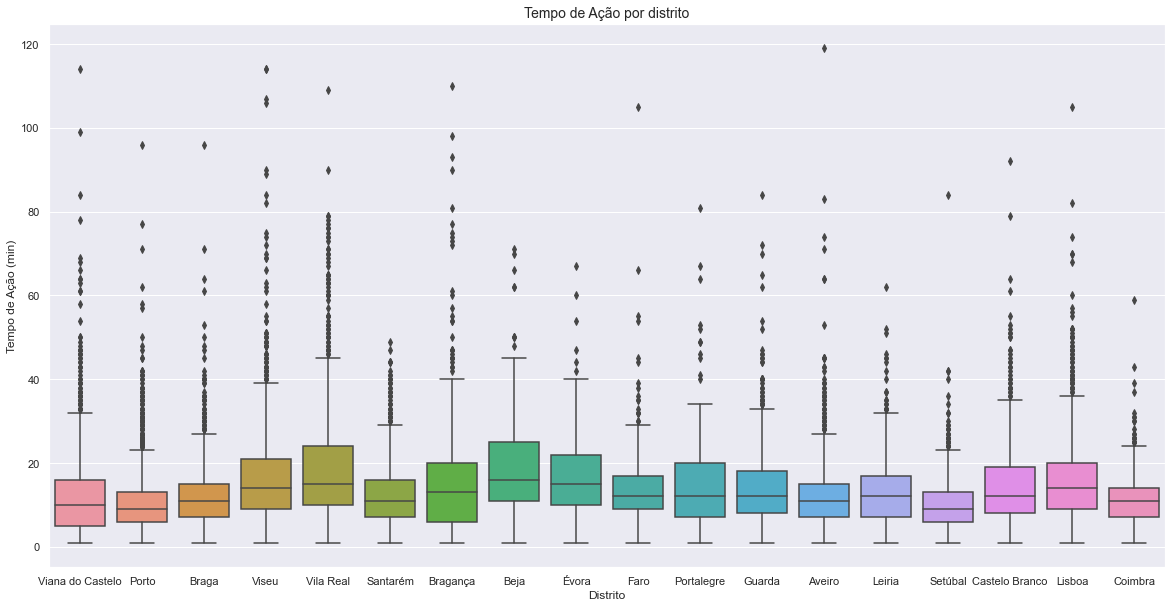

In [19]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.boxplot(x = df5.Distrito, y = df5.TempoAcao)
plt.title('Tempo de Ação por distrito', fontsize = 14)
plt.xlabel('Distrito')
plt.ylabel('Tempo de Ação (min)')


In [20]:
print(len(df5.index))

19420


### Univariate Analysis<a class="anchor" id="univar"></a>

Once the data is already cleaned, the next step is to analyse each variables by it's own.

#### Dataframe discribe

In [21]:
#df4.groupby(['Distrito']).TempoAcao.mean()
df5.describe(include='all')
#print(len(df5.index))

,Tipo,Distrito,DataAlerta,DataIntervencao,TempoAcao,AreaTotalQueimada
count,19420,19420,19420,19420,19420.000000,19420.000000
unique,3,18,18342,17725,NaN,NaN
top,Florestal,Porto,2015-08-10 15:40:00,2015-08-08 16:00:00,NaN,NaN
freq,14856,3932,4,5,NaN,NaN
first,NaN,NaN,2015-01-01 05:08:00,2015-01-01 05:36:00,NaN,NaN
last,NaN,NaN,2015-12-30 11:44:00,2015-12-30 12:01:00,NaN,NaN
mean,NaN,NaN,NaN,NaN,13.318280,3.336738
std,NaN,NaN,NaN,NaN,9.879389,54.318449
min,NaN,NaN,NaN,NaN,1.000000,0.000010
25%,NaN,NaN,NaN,NaN,7.000000,0.010000


This is a brief discription of the dataframe, which allow us to get some ideas about these variables. Further analysis will be discuss next.

#### <font color='royalblue'>TempoAcao</font><a class="anchor" id="tempoacao"></a>

In [22]:
df5['TempoAcao'].describe()

count    19420.000000
mean        13.318280
std          9.879389
min          1.000000
25%          7.000000
50%         11.000000
75%         16.000000
max        119.000000
Name: TempoAcao, dtype: float64

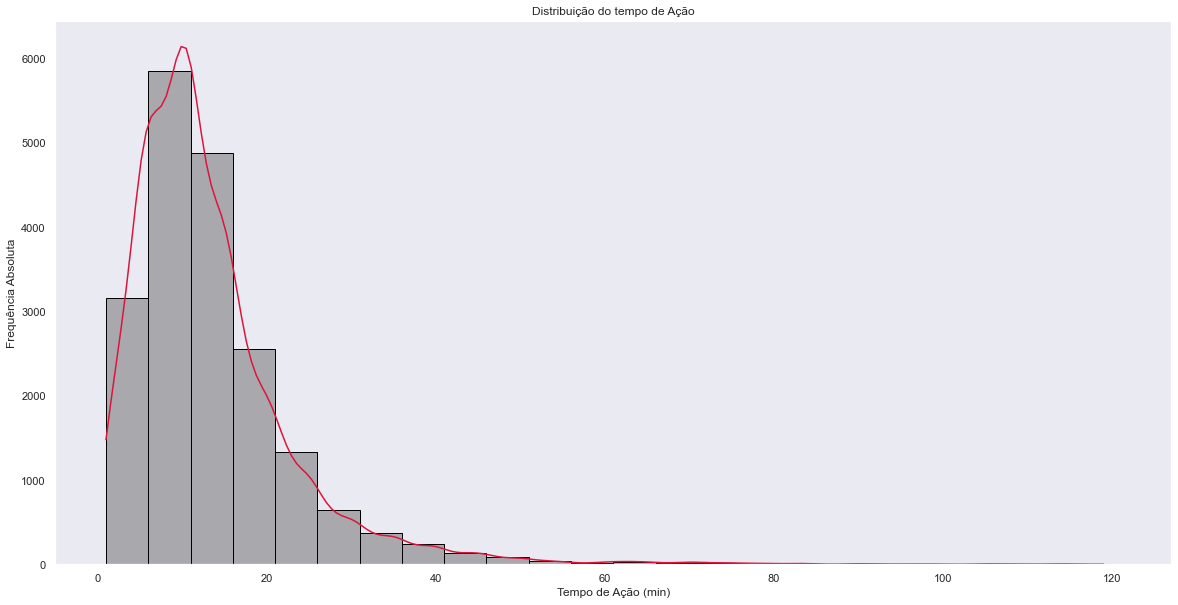

In [23]:
sns.set(rc = {'figure.figsize':(20,10)})
ta = sns.histplot(x = df5.TempoAcao, kde = True, color = 'dimgray', binwidth=5, edgecolor = 'black')
ta.lines[0].set_color('crimson')
plt.title('Distribuição do tempo de Ação')
plt.xlabel('Tempo de Ação (min)')
plt.ylabel('Frequência Absoluta')
plt.grid()


Text(0.5, 0, 'Tempo de Ação (min)')

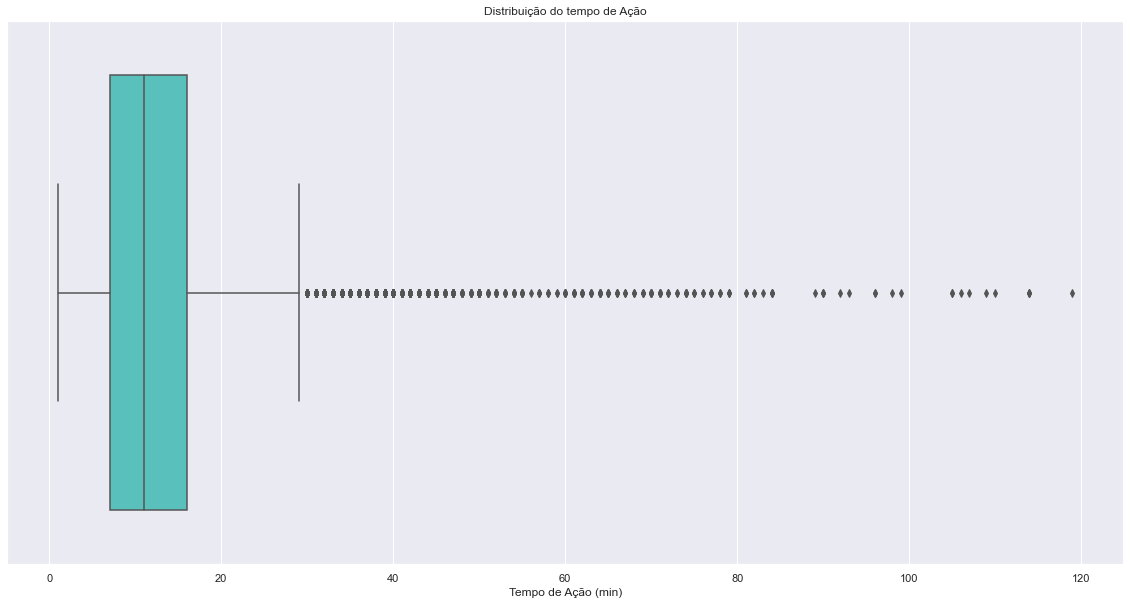

In [24]:
sns.boxplot(df5.TempoAcao, color = 'mediumturquoise')
plt.title('Distribuição do tempo de Ação')
plt.xlabel('Tempo de Ação (min)')

Through this plots, we can observe that the distribution is right skew. In order to produce a symmetric distribution, I applied a log transformation, because it compresses the lower values and spreads the higher values. This new variable(TempoAcao_log) allow to visualize aproximately the normal distribution of TempoAcao.

In [25]:
df5['TempoAcao_log'] = np.log(df5['TempoAcao'])
df5

,Tipo,Distrito,DataAlerta,DataIntervencao,TempoAcao,AreaTotalQueimada,TempoAcao_log
0,Florestal,Viana do Castelo,2015-03-24 17:01:00,2015-03-24 17:10:00,9.0,2.5000,2.197225
1,Florestal,Porto,2015-03-24 17:10:00,2015-03-24 17:16:00,6.0,1.3500,1.791759
2,Florestal,Braga,2015-03-24 19:15:00,2015-03-24 19:25:00,10.0,0.2600,2.302585
4,Agrícola,Viseu,2015-03-24 20:10:00,2015-03-24 20:15:00,5.0,0.0500,1.609438
5,Florestal,Braga,2015-03-24 18:03:00,2015-03-24 18:15:00,12.0,1.5000,2.484907
...,...,...,...,...,...,...,...
23168,Florestal,Braga,2015-08-08 13:51:00,2015-08-08 14:10:00,19.0,0.0400,2.944439
23169,Florestal,Santarém,2015-08-08 14:16:00,2015-08-08 14:34:00,18.0,0.3425,2.890372
23170,Florestal,Braga,2015-08-09 02:10:00,2015-08-09 02:20:00,10.0,0.5000,2.302585
23171,Florestal,Viseu,2015-08-09 04:40:00,2015-08-09 04:53:00,13.0,2.5000,2.564949


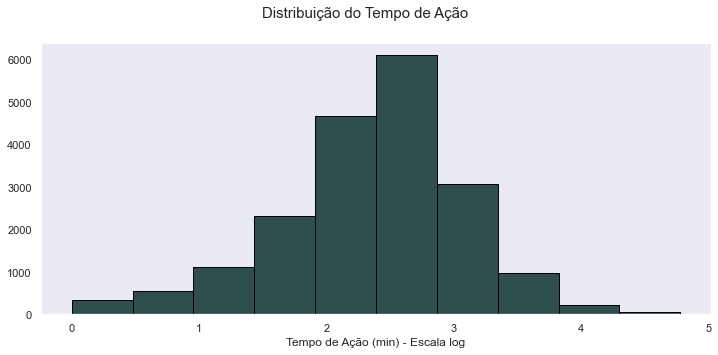

In [26]:
plt.subplots(figsize = (12, 5))
plt.hist(x = df5.TempoAcao_log, color = 'darkslategray', ec="black")
plt.suptitle('Distribuição do Tempo de Ação', fontsize=15)
plt.xlabel('Tempo de Ação (min) - Escala log')
plt.grid()

**Conclusions about <font color='royalblue'>TempoAcao</font>:**

- The average time to start fight the fire is 13.3 minutes.
- At least 75% of the fires took less than 16 minutes to started to be fighted.
 

#### <font color='royalblue'>AreaTotalQueimada</font><a class="anchor" id="queimada"></a>

In [27]:
df5['AreaTotalQueimada'].describe()

count    19420.000000
mean         3.336738
std         54.318449
min          0.000010
25%          0.010000
50%          0.058000
75%          0.500000
max       4673.000000
Name: AreaTotalQueimada, dtype: float64

(0.0, 5.0)

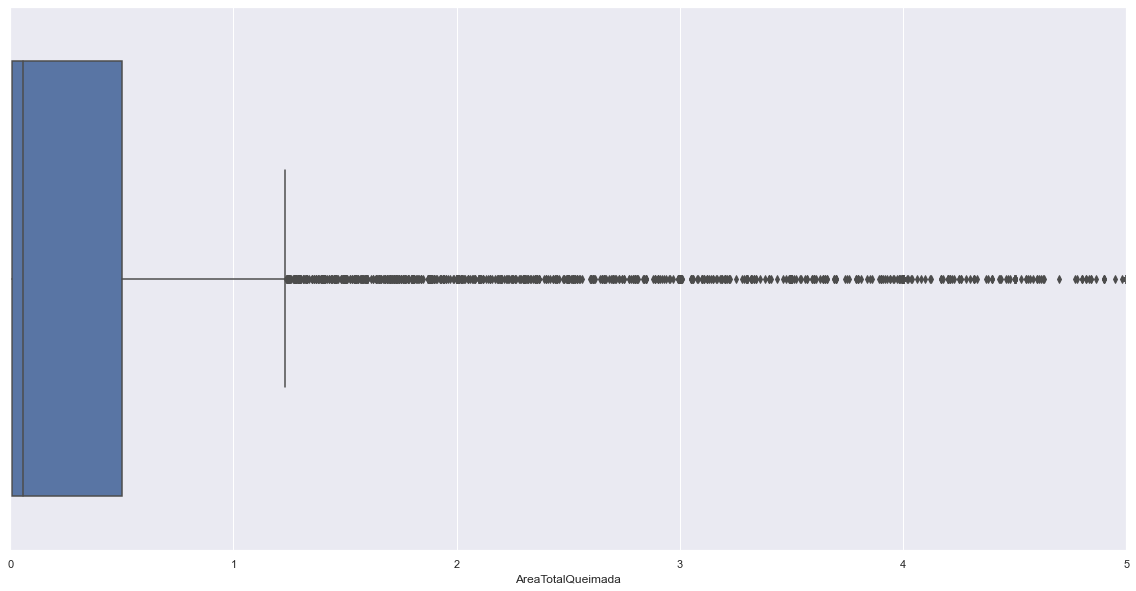

In [28]:
sns.boxplot(x = df5.AreaTotalQueimada)
plt.xlim(0,5)

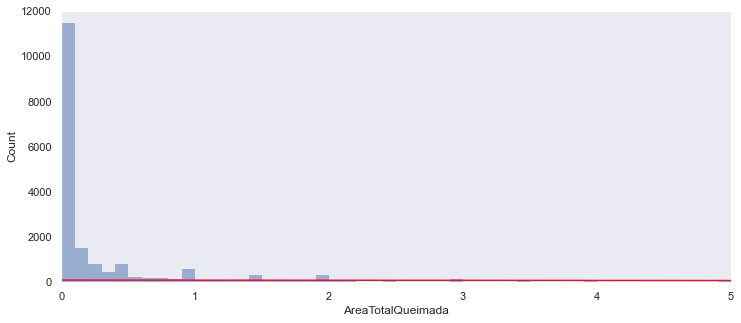

In [29]:
plt.subplots(figsize = (12, 5))
ax = sns.histplot(x = df5.AreaTotalQueimada, binwidth = 0.1 , kde = True)
ax.lines[0].set_color('crimson')
plt.xlim(0,5)
plt.grid()


**Conclusions about <font color='royalblue'>AreaTotalQueimada</font>:**

- Is this variable, the mean is truly afected by the extreme values, which does not give us a trustworthy way to analyse this variable.
- By the caculating the third quartile is possible to confirm that 75% of the fires has less than 0.5 acres burnt, which give a better idea of how much area was burnt.
- On the other side, 25% of the fires coutributed to an huge increase of total burnt area.


#### <font color='royalblue'>DataAlerta & HoraAlerta</font><a class="anchor" id="dh"></a>

**NOTE:** This variables will be treated together, because it represents that same for this study goal. In this case, I want to extract and analyse when occur the most fires

In [30]:
df['DataAlerta'].groupby(df.DataAlerta.dt.to_period("M")).describe()

,count,unique,top,freq,first,last
DataAlerta,,,,,,
2015-01,300,299,2015-01-02 12:30:00,2,2015-01-01 00:08:00,2015-01-31 11:27:00
2015-02,391,381,2015-02-22 14:20:00,3,2015-02-01 16:22:00,2015-02-28 21:30:00
2015-03,2638,2446,2015-03-23 12:49:00,3,2015-03-01 04:01:00,2015-03-31 23:57:00
2015-04,1865,1715,2015-04-02 14:05:00,4,2015-04-01 00:28:00,2015-04-30 20:17:00
2015-05,1943,1842,2015-05-28 13:45:00,3,2015-05-01 00:57:00,2015-05-31 23:44:00
2015-06,2588,2454,2015-06-04 14:10:00,3,2015-06-01 00:40:00,2015-06-30 23:59:00
2015-07,4345,4046,2015-07-11 17:44:00,4,2015-07-01 00:09:00,2015-07-31 23:23:00
2015-08,4677,4275,2015-08-10 15:40:00,4,2015-08-01 00:23:00,2015-08-31 23:40:00
2015-09,2730,2588,2015-09-26 23:22:00,3,2015-09-01 00:46:00,2015-09-30 23:27:00


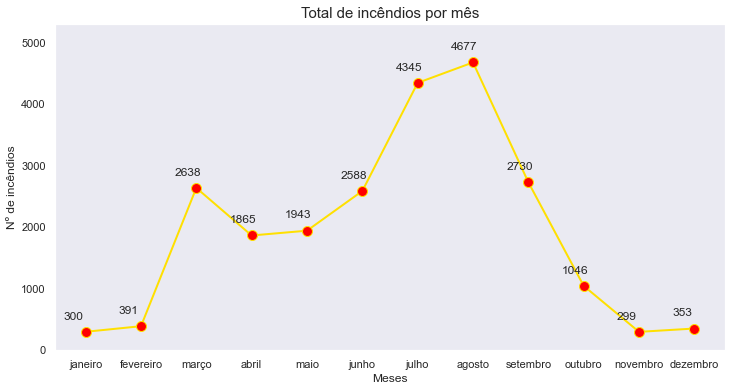

In [31]:
count_dataAlerta = df['DataAlerta'].groupby(df.DataAlerta.dt.to_period("M")).agg('count')

months = ["janeiro", "fevereiro", "março", "abril", "maio", "junho", "julho", "agosto","setembro", "outubro", "novembro", "dezembro"]
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
plt.plot( months, count_dataAlerta,  marker='o', markerfacecolor='red', markersize=10, color='#FFE000', linewidth=2)
listValues =count_dataAlerta.tolist()
plt.xlabel('Meses')
plt.ylabel('Nº de incêndios')
plt.title('Total de incêndios por mês', fontsize=15)
plt.ylim(0,5300)
ax.grid()
count = 1



for i in listValues:
    ax.annotate(listValues[count-1], xy=(count-1.4, i+200))
    count += 1 
plt.show()

In [32]:
h1 = []
for x in df["HoraAlerta"]:
    a = float(x.hour)
    h1.append(a)
df6 = pd.DataFrame(h1, columns =['HoraAlerta'])

data2 = df6.groupby(['HoraAlerta']).size().reset_index(name='counts')

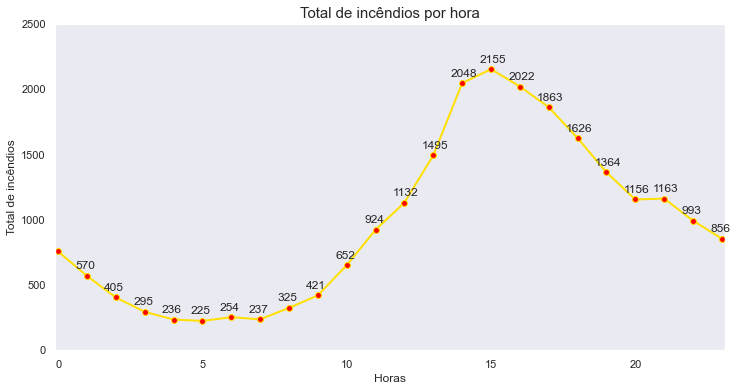

In [33]:
data3 = pd.Series(data2['counts'])
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
ax.set_xlim([-0.1,23.1])
ax.set_ylim(0,2500)
ax.plot(data2["HoraAlerta"], data2["counts"], 'g-o', markerfacecolor='red', color='#FFE000', linewidth=2)
ax.set_ylabel('Total de incêndios')
ax.set_xlabel('Horas')
ax.set_title('Total de incêndios por hora', fontsize=15)
ax.grid()



listValues =data3.tolist()
count = 1

for i in listValues:
    ax.annotate(listValues[count-1], xy=(count-1.4, i+50))
    count += 1

**Conclusions about <font color='royalblue'>DataAlerta & HoraAlerta</font>:**

- Most of the fires ocur in summer, as I expected.
- March has a high value, although I don't have a evidence to explain why.
- Most of the fires started between 12h and 16h, which is a result that I was not expect. This result perhaps can be explained through the higher temperatures that ocurs in that period of the day.

#### <font color='darkorange'>Tipo</font><a class="anchor" id="tipo"></a>

In [34]:
df3.groupby('Tipo')['Tipo'].count()

Tipo
Agrícola         4044
Falso Alarme     2216
Florestal       15108
Queimada          608
Name: Tipo, dtype: int64

(0.0, 100.0)

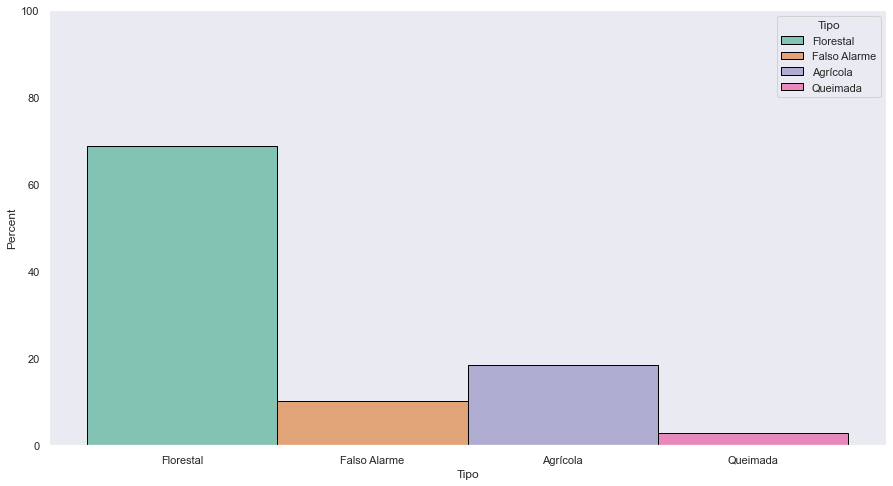

In [35]:
fig, axes = plt.subplots(figsize = (15, 8))
sns.histplot(x = df3.Tipo, stat='percent', hue=df.Tipo, palette='Dark2', edgecolor = 'black')
plt.grid()
plt.ylim(0,100)


**Conclusions about <font color='darkorange'>Tipo</font>:**

- More than 60% of the fires were Florestal fires.
- Queimadas only represent a minimal percentage of total fires, although sometimes media transmits the opposite.

#### <font color='darkorange'>Distrito</font><a class="anchor" id="distrito"></a>

In [36]:
df3['Distrito'].describe()

count     21976
unique       18
top       Porto
freq       4391
Name: Distrito, dtype: object

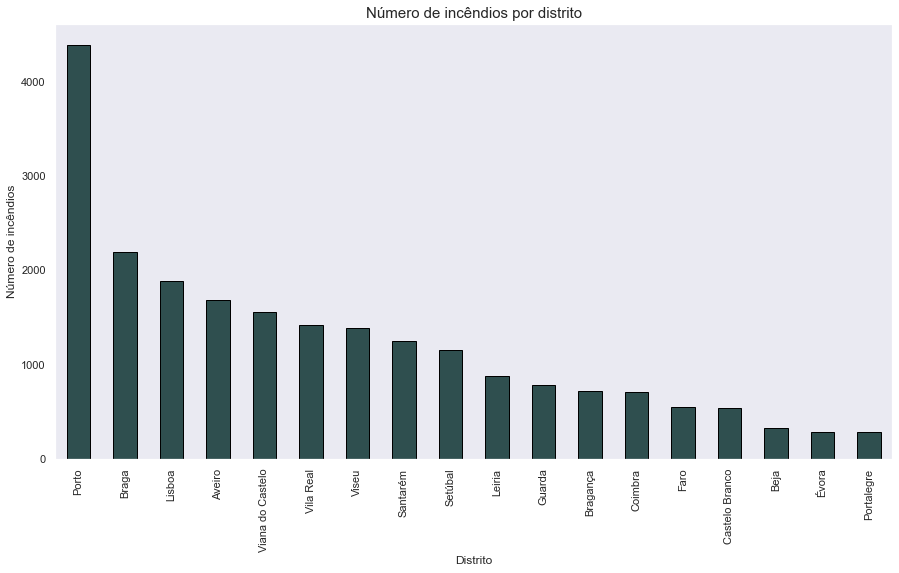

In [37]:
fig, axes = plt.subplots(figsize = (15, 8))
count_dist=df3.groupby('Distrito')['Distrito'].count()
count_dist = count_dist.sort_values(ascending=False)
ax = count_dist.plot.bar(color="darkslategray",ec="black")
ax.set_ylabel('Número de incêndios')
ax.set_title('Número de incêndios por distrito',fontsize=15)
ax.grid()

**Conclusions about <font color='darkorange'>Distrito</font>:**

- Porto was the most affected district, almost two times more than the others.
- Districts on coast were the most affected - Top 5: Porto, Braga, Lisboa, Aveiro and Viana do Castelo.

### Multivariate analysis<a class="anchor" id="multi"></a>

In this part, I will analyse the relation between the chosen variables.

In [38]:
tempoacao = df5.groupby(['Distrito']).TempoAcao.mean().reset_index()
tempoacao.sort_values('TempoAcao')

,Distrito,TempoAcao
11,Porto,10.238301
13,Setúbal,10.380952
5,Coimbra,11.496721
2,Braga,11.845084
0,Aveiro,12.290850
14,Viana do Castelo,12.505036
12,Santarém,12.597502
8,Leiria,12.909200
6,Faro,13.935733
7,Guarda,14.122727


(0.0, 80.0)

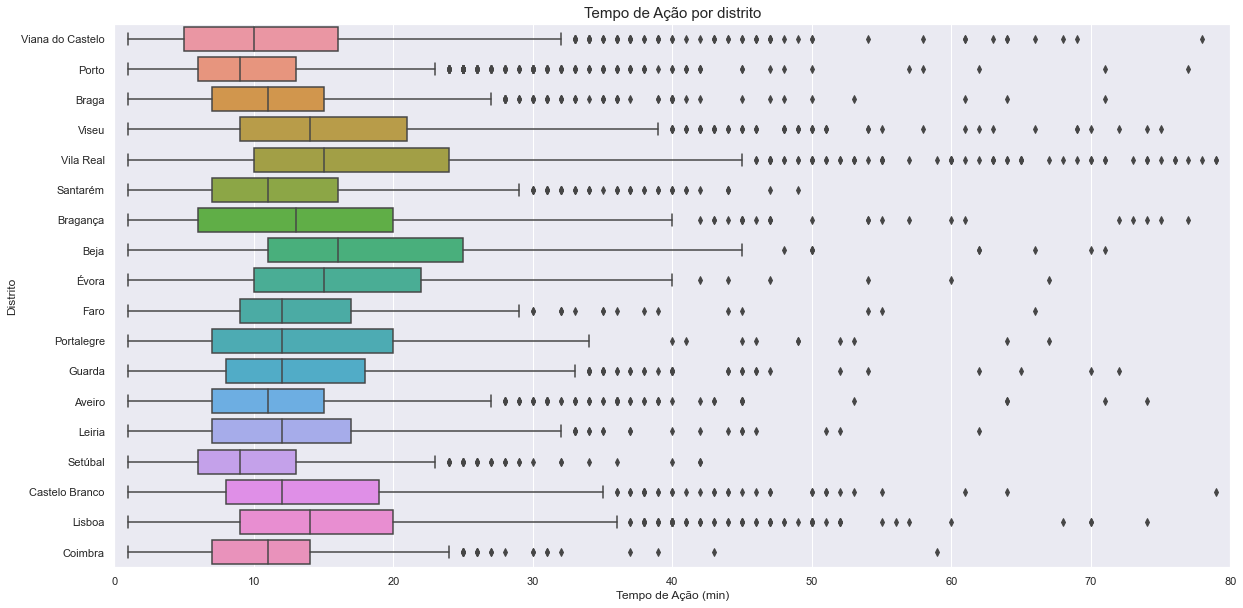

In [39]:
sns.boxplot(y = df5.Distrito, x = df5.TempoAcao)

plt.xlabel('Tempo de Ação (min)')
plt.ylabel('Distrito')
plt.title('Tempo de Ação por distrito',fontsize=15)
plt.xlim(0,80)

Taking a closer look in this two variables, is possible to confirm that besides Porto has the higher number of fires, the firefighters took less time to reach the fire and fight it. Districts like Viseu, Vila Real and Beja, which are in the interior, have higher TempoAcao. This perhaps can be explained by the lack of accessibility to the local where the fire occurs. 

In [40]:
tempoacao = df5.groupby(['Tipo']).TempoAcao.mean().reset_index()
tempoacao.sort_values('TempoAcao')

,Tipo,TempoAcao
0,Agrícola,12.911831
1,Florestal,13.408656
2,Queimada,13.790738


(0.0, 80.0)

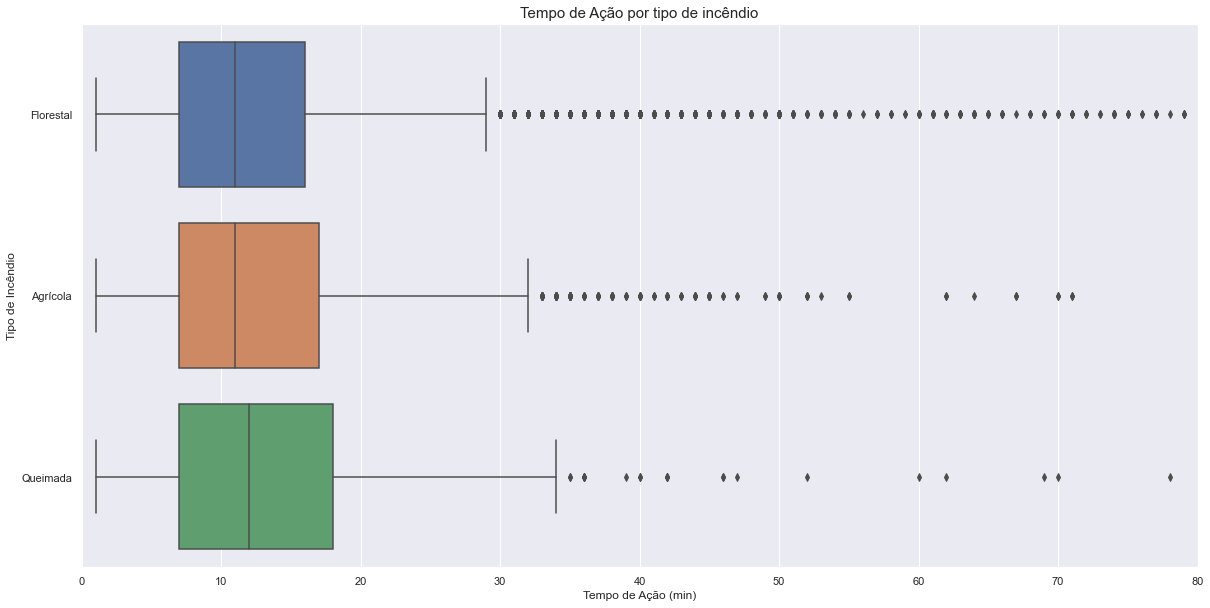

In [41]:
sns.boxplot(y = df5.Tipo, x = df5.TempoAcao)
plt.xlabel('Tempo de Ação (min)')
plt.ylabel('Tipo de Incêndio')
plt.title('Tempo de Ação por tipo de incêndio',fontsize=15)
plt.xlim(0,80)

This results confirms the previous ones, because we can see that Florestal fires took, on average, more time to be fighted although it median is lower than the others. Since we have zones with extremely difficult acess, fires that ocurred in that zones, increased the mean.

In [42]:
tipo = df5.groupby(['Distrito','Tipo']).size().reset_index(name='count')
tipo.sort_values('count', ascending=False)

,Distrito,Tipo,count
30,Porto,Florestal,3717
6,Braga,Florestal,1787
42,Vila Real,Florestal,1229
39,Viana do Castelo,Florestal,1123
45,Viseu,Florestal,1122
25,Lisboa,Florestal,1009
1,Aveiro,Florestal,915
36,Setúbal,Florestal,756
9,Bragança,Florestal,620
24,Lisboa,Agrícola,609


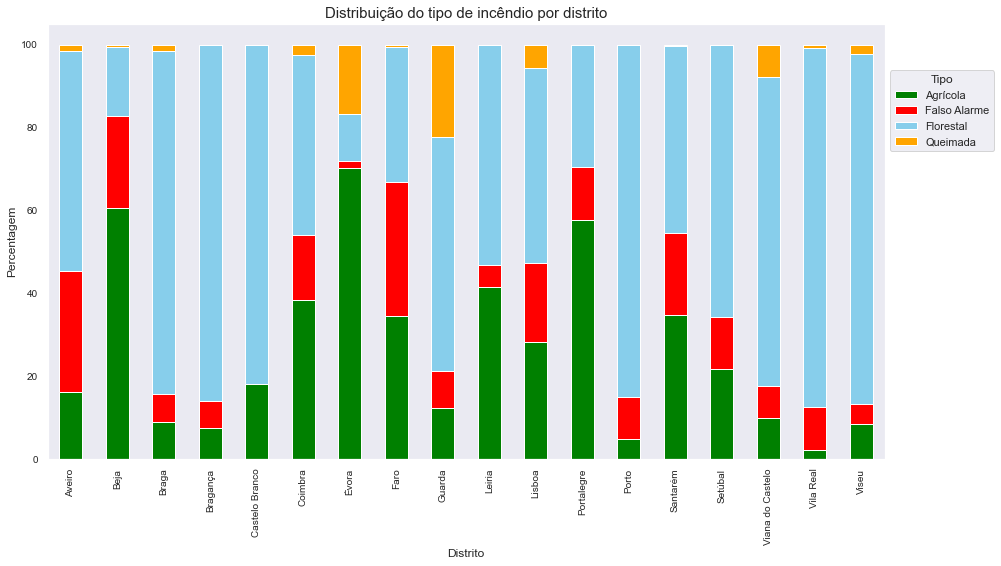

In [43]:
districts = ['Aveiro', 'Beja', 'Braga', 'Bragança', 'Castelo Branco', 'Coimbra', 'Évora', 'Faro', 'Guarda', 'Leiria', 'Lisboa', 'Portalegre', 'Porto', 'Santarém', 'Setúbal', 'Viana do Castelo', 'Vila Real', 'Viseu']
ax = pd.crosstab(df['Distrito'], df['Tipo']).apply(lambda r: r/r.sum()*100, axis=1)

ax.loc[districts].plot(kind = 'bar', figsize=(15, 8), fontsize = 10, stacked=True, color = ['green', 'red', 'skyblue', 'orange'], rot=90)

plt.legend(loc='center left',bbox_to_anchor=(1, 0.80), title="Tipo")
plt.xlabel('Distrito')
plt.ylabel('Percentagem')
plt.title('Distribuição do tipo de incêndio por distrito', fontsize = 15)
plt.grid()


Through the results, is possible to confirm that Beja, Evora and Portalegre had more fires of type Agrícola - >50%.
Braga, Bragança and Vila Real, had almost all fires of type Florestal - >50%.
Note for Aveiro and Faro, which had a high percentage of Falso Alarme.

In [44]:
tempoacao = df5.groupby(['Distrito']).AreaTotalQueimada.sum().reset_index()
tempoacao.sort_values('AreaTotalQueimada', ascending=False)

,Distrito,AreaTotalQueimada
7,Guarda,12808.346764
14,Viana do Castelo,9856.387800
16,Viseu,6378.313400
2,Braga,5637.858200
15,Vila Real,5445.931800
3,Bragança,5160.882289
0,Aveiro,3129.751000
4,Castelo Branco,3060.763070
12,Santarém,2697.149607
11,Porto,2432.816900


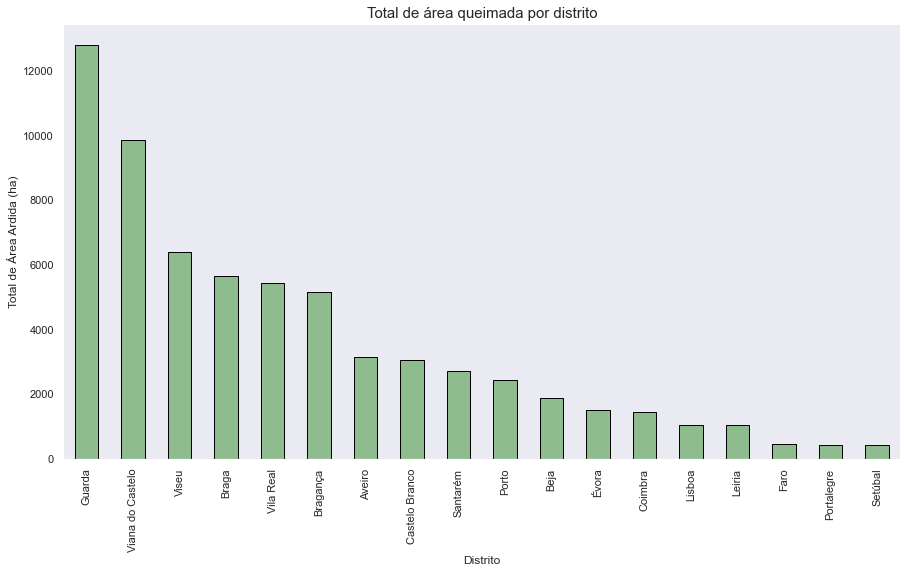

In [45]:
fig, axes = plt.subplots(figsize = (15, 8))
count_dist=df5.groupby('Distrito')['AreaTotalQueimada'].sum()
count_dist = count_dist.sort_values(ascending=False)
ax = count_dist.plot.bar(color="darkseagreen",ec="black")
ax.set_ylabel('Total de Área Ardida (ha)')
ax.set_title('Total de área queimada por distrito',fontsize=15)
ax.grid()

In this results, it is clear that Guarda and Viana do Castelo was the most affected districts by fires, with almost two times the total burnt area of the other districts.

## STEP 4 : Draw Inferences<a class="anchor" id="infer"></a>


### **Question 1:**<a class="anchor" id="q1"></a>

- Fires with TempoAcao greater than 13 minutes have a AreaTotalQueimada above than 50 acres?

- H0: = area ardida
- H1: > Area ardida

In [140]:
lista = []
for i in range(1,50):
    df = df5[df5.TempoAcao > 13].sample(n=50)
    df = sum(df['AreaTotalQueimada'])
    lista.append(df)

x2 = np.array(lista)

<AxesSubplot:ylabel='Count'>

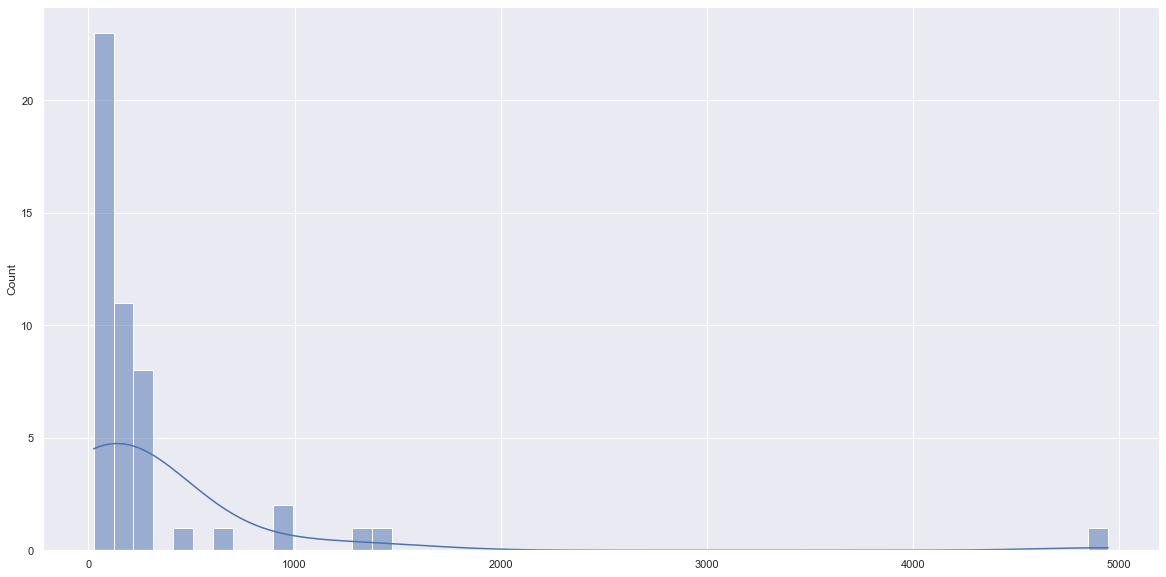

In [142]:
sns.histplot(x=x1, kde=True)

In [143]:
import numpy as np 
from scipy.stats import t
m = x2.mean() 
s = x2.std() 
dof = len(x1)-1 
confidence = 0.95
t_crit = np.abs(t.ppf((1-confidence)/2,dof))
print(f"Confidence interval:", (m-s*t_crit/np.sqrt(len(xw)), m+s*t_crit/np.sqrt(len(xw)))) 

Confidence interval: (117.50342913906385, 539.3343007793035)


## Step 5 : Formulate conclusions<a class="anchor" id="conc"></a>

Since the value is outside the confidence interval, is possible to reject the null hypotesis. So, there statistical evidence to claim that fires with TempoAcao greater than 13 minutes lead to a higher burnt area.

## Step 6 : Look back and ahead<a class="anchor" id="ba"></a>

- In short, it was interesting to do this work. 

- It allowed me a greater resolution at the statistical level.

- It would be interesting to analyze, in future works, other factors that influence fires, such as temperature, humidity, wind intensity or soil drought.